# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 


### Generate the Cities List by Using the `citipy` Library

In [67]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [68]:
cities

['port-aux-francais',
 'albany',
 'qaqortoq',
 'afaahiti',
 'jand',
 'udachny',
 'ushuaia',
 'greymouth',
 'keflavik',
 'gao',
 'ust-nera',
 'vilyuchinsk',
 'lobau',
 'waitangi',
 'grytviken',
 'bethel',
 'tiksi',
 'hamilton',
 'hede',
 'kodiak',
 "novyy turtkul'",
 'west island',
 'ribeira grande',
 'lebu',
 'sao joao da barra',
 'gardony',
 'benjamin hill',
 'adamstown',
 'opuwo',
 'iqaluit',
 'colonia',
 'ibiruba',
 'margaret river',
 'saint-leu',
 'invercargill',
 'ilulissat',
 'ventura',
 'turpan',
 'boulsa',
 'laborde',
 'saint simons island',
 'hawaiian paradise park',
 'utrik',
 'cockburn town',
 'puerto natales',
 'souillac',
 'dakhla',
 'oblivskaya',
 'devinuwara',
 'bilibino',
 'longgang',
 'yellowknife',
 'isafjordur',
 'whitehorse',
 'port elizabeth',
 'conde',
 'hauterive',
 'tranovaho',
 'guatrache',
 'sao felipe',
 'iskateley',
 'tofol',
 'san antonio de pale',
 'callao',
 'sassandra',
 'indre arna',
 'taiohae',
 'port mathurin',
 'blackmans bay',
 'bubaque',
 'howard s

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print (url + "&q=San Francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=6b1bf7b24390e4ac73964b18d6eea75c&q=San Francisco


In [70]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
      # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=metrics&appid=6b1bf7b24390e4ac73964b18d6eea75c
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | jand
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | greymouth
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | gao
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | vilyuchinsk
Processing Record 13 of Set 1 | lobau
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | hede
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | novyy turt

Processing Record 36 of Set 4 | tekkali
Processing Record 37 of Set 4 | dickinson
Processing Record 38 of Set 4 | tibiri
Processing Record 39 of Set 4 | fale old settlement
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | haverfordwest
Processing Record 42 of Set 4 | wailua homesteads
Processing Record 43 of Set 4 | dwarka
Processing Record 44 of Set 4 | calama
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | las tablas
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | anna regina
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | sabancuy
Processing Record 1 of Set 5 | remire-montjoly
Processing Record 2 of Set 5 | puerto cortez
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | cambria
Processing Record 5 of Set 5 | kinkala
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | bamusso
Processing Record 8 of Set 5 | tralee
Processing Record 9 of Set

Processing Record 29 of Set 8 | labasa
Processing Record 30 of Set 8 | galesong
Processing Record 31 of Set 8 | ganshui
Processing Record 32 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 33 of Set 8 | runing
Processing Record 34 of Set 8 | little cayman
City not found. Skipping...
Processing Record 35 of Set 8 | guadalupe
Processing Record 36 of Set 8 | calabozo
Processing Record 37 of Set 8 | halifax
Processing Record 38 of Set 8 | magadan
Processing Record 39 of Set 8 | alice town
Processing Record 40 of Set 8 | magong
Processing Record 41 of Set 8 | maubara
City not found. Skipping...
Processing Record 42 of Set 8 | itamaraju
Processing Record 43 of Set 8 | huambo
Processing Record 44 of Set 8 | beidao
Processing Record 45 of Set 8 | sisimiut
Processing Record 46 of Set 8 | juegang
Processing Record 47 of Set 8 | arno
Processing Record 48 of Set 8 | villamontes
Processing Record 49 of Set 8 | i-n-salah
Processing Record 0 of Set 9 | sirte
Processing Record 1 of S

Processing Record 17 of Set 12 | chernyshevskiy
Processing Record 18 of Set 12 | hassi messaoud
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | arrah
Processing Record 21 of Set 12 | timmins
Processing Record 22 of Set 12 | kalmunai
Processing Record 23 of Set 12 | itambacuri
Processing Record 24 of Set 12 | kavaratti
Processing Record 25 of Set 12 | tarawa
Processing Record 26 of Set 12 | tete
Processing Record 27 of Set 12 | beni mellal
Processing Record 28 of Set 12 | taroa
Processing Record 29 of Set 12 | pont rouge
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | rosarito
Processing Record 32 of Set 12 | fayroz koh
Processing Record 33 of Set 12 | anar darah
Processing Record 34 of Set 12 | divnomorskoye
Processing Record 35 of Set 12 | kaa-khem
Processing Record 36 of Set 12 | okha
Processing Record 37 of Set 12 | mersa matruh
Processing Record 38 of Set 12 | pathein
Processing Record 39 of Set 12 | boryeong
Processing Record 40 

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,281.55,91,97,19.78,TF,1683873675
1,albany,42.6001,-73.9662,286.99,78,80,1.34,US,1683873676
2,qaqortoq,60.7167,-46.0333,274.78,87,100,1.93,GL,1683873678
3,afaahiti,-17.7500,-149.2833,297.08,93,100,11.14,PF,1683873693
4,jand,33.4299,72.0193,308.13,14,4,1.32,PK,1683873964


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,281.55,91,97,19.78,TF,1683873675
1,albany,42.6001,-73.9662,286.99,78,80,1.34,US,1683873676
2,qaqortoq,60.7167,-46.0333,274.78,87,100,1.93,GL,1683873678
3,afaahiti,-17.7500,-149.2833,297.08,93,100,11.14,PF,1683873693
4,jand,33.4299,72.0193,308.13,14,4,1.32,PK,1683873964


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

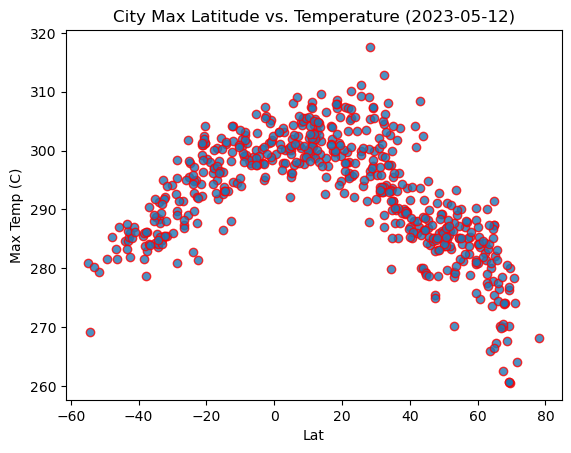

In [75]:
import time
import matplotlib.pyplot as plt


# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Lat")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

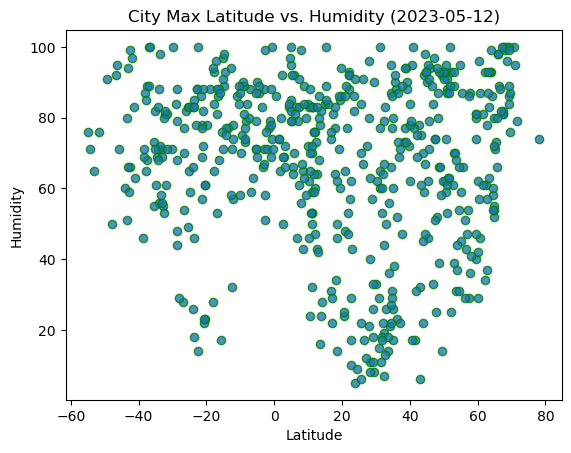

In [76]:
import time
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor= "green",
    linewidths= 1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

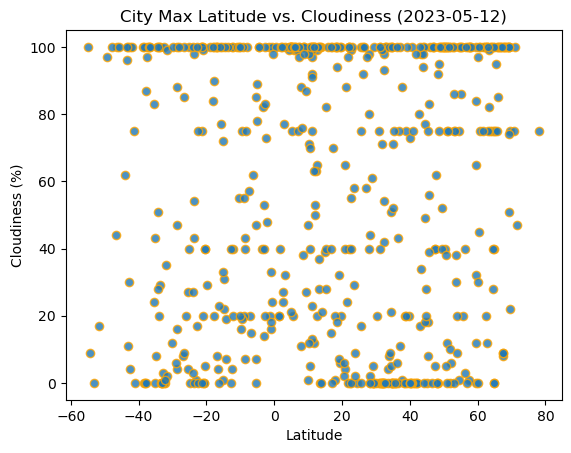

In [77]:
import time
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

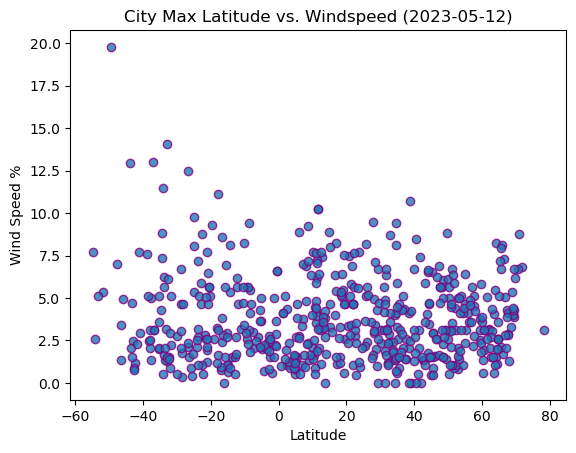

In [78]:
import time
# Build the scatter plots for latitude vs. wind speed

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Windspeed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed %")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def plot_linear_regression (x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value,"r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Lat ")
    plt.ylabel("title")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude > 0)
northern_hemi_df =city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,286.99,78,80,1.34,US,1683873676
2,qaqortoq,60.7167,-46.0333,274.78,87,100,1.93,GL,1683873678
4,jand,33.4299,72.0193,308.13,14,4,1.32,PK,1683873964
5,udachny,66.4167,112.4000,276.40,89,100,7.32,RU,1683873680
8,keflavik,64.0049,-22.5624,280.10,93,100,1.54,IS,1683873674


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df =city_data_df[city_data_df["Lat"] <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,281.55,91,97,19.78,TF,1683873675
3,afaahiti,-17.7500,-149.2833,297.08,93,100,11.14,PF,1683873693
6,ushuaia,-54.8000,-68.3000,280.96,76,100,7.72,AR,1683873687
7,greymouth,-42.4667,171.2000,281.89,66,4,1.15,NZ,1683873791
13,waitangi,-43.9535,-176.5597,284.56,60,62,12.94,NZ,1683873678


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6894136450768186


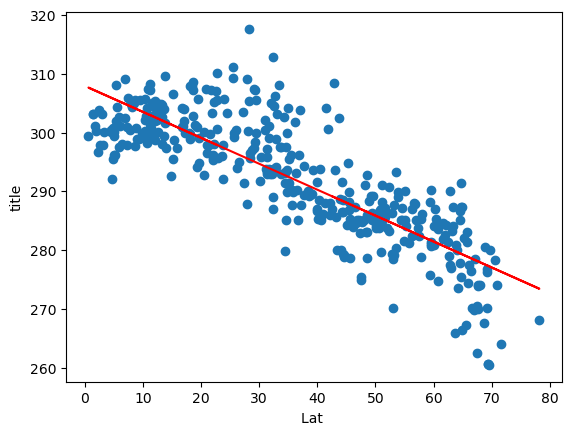

In [82]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6, -10))

The r-value is 0.6877878607053067


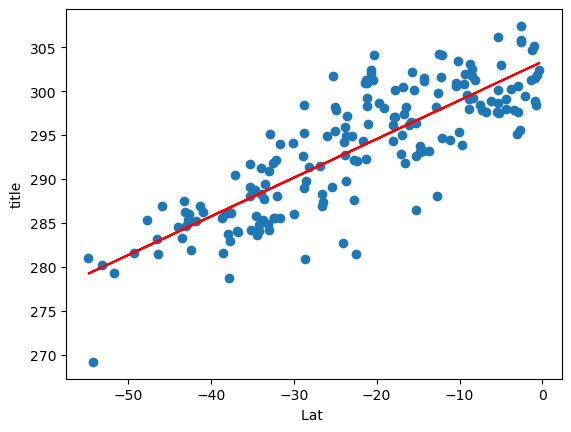

In [83]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-35,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

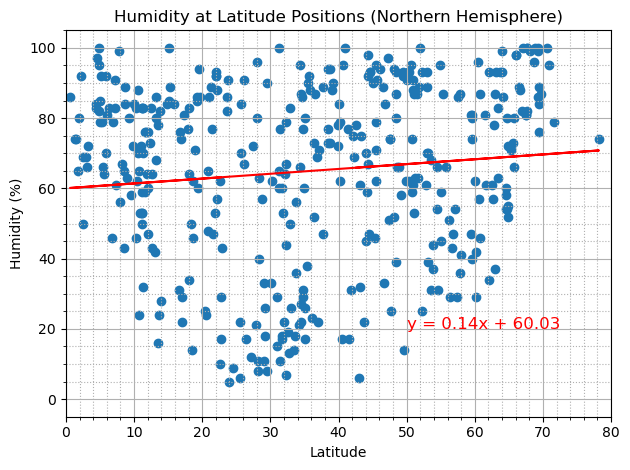

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

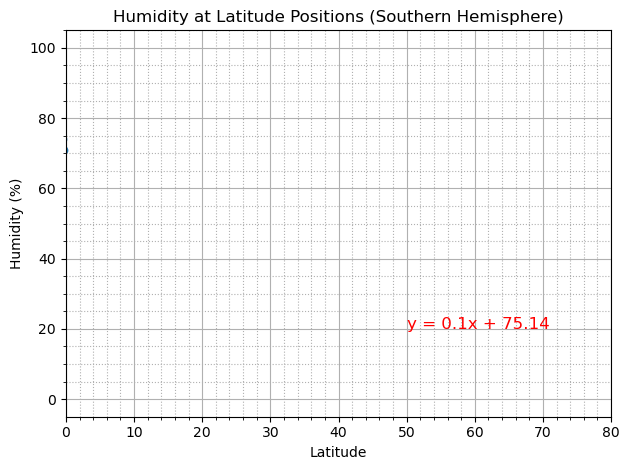

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:*
:There does not seem to be a very strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

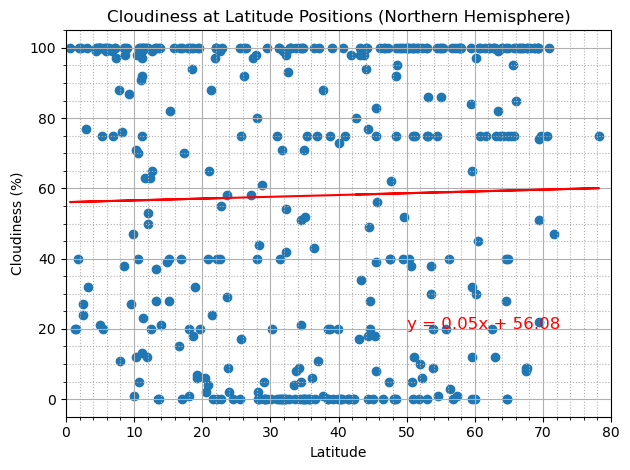

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

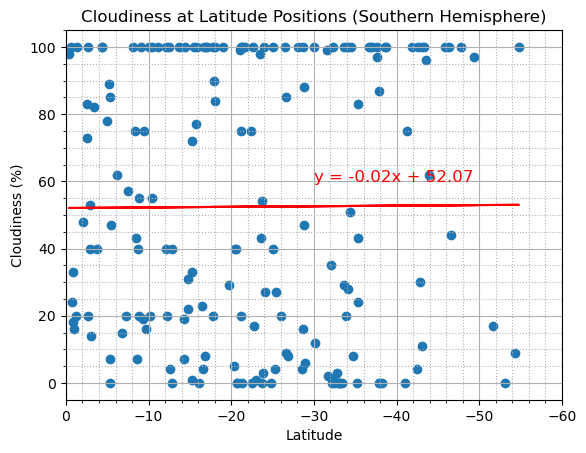

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:
 There does not seem to be much correlation between cloudiness and latitude when you look at the plots. However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

### Wind Speed vs. Latitude Linear Regression Plot

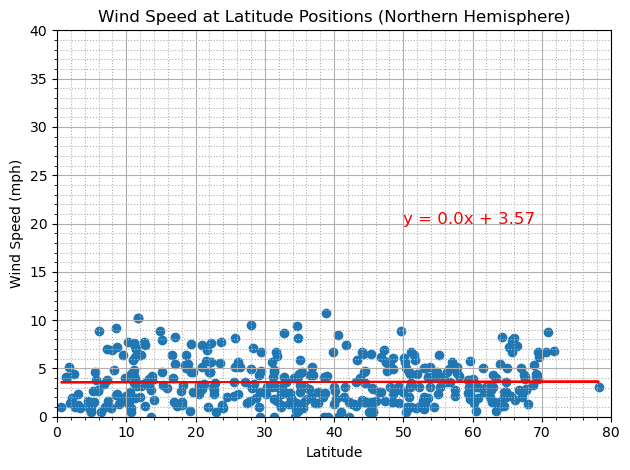

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

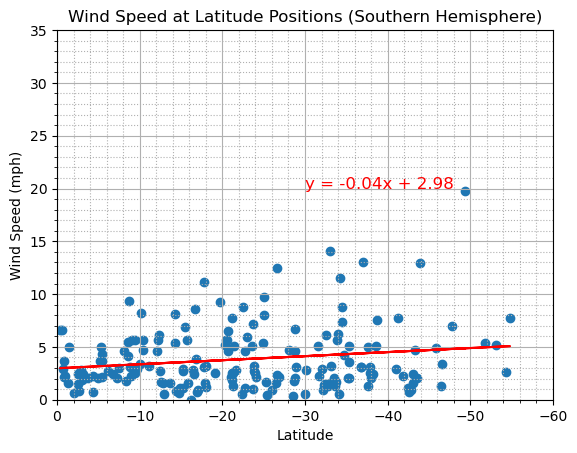

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:
It does seem to be a pretty strong correlation between wind speed and latitude when you look at the plots.